<a href="https://colab.research.google.com/github/Jerry0209/FundamentalLearningEPFL/blob/main/TP2/lighthouse_Jerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE-411 Fundamentals of inference and learning, EPFL
## Exercise Session 2: optimizing functions using scipy

In this second set of exercises, we will solve the so-called *Lighthouse problem*, which serves as a perfect opportunity to introduce a very useful package for scientific computing, called **scipy**.

**What you will learn today:** In this second session, we will discuss how to use **scipy** to generate random data according to a certain distribution and to minimize 1D and 2D functions. Furthermore, we will have a first-hand application of some concepts explained in the second lecture, such as the maximal likelihood estimator, Cramér–Rao bound and Jeffreys prior.


# The Lighthouse problem

**Locating the lighthouse**

A lighthouse is located somewhere off a piece of straight coastline at a position $\alpha$ (or $x_0$) along the shore and a distance $\beta$ (or $y_0$) out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. N flashes have so far been recorded at positions $\{x_k\}$. Where is the lighthouse?’ (from D. Sivia's book, "Data Analysis - A Bayesian Tutorial")

[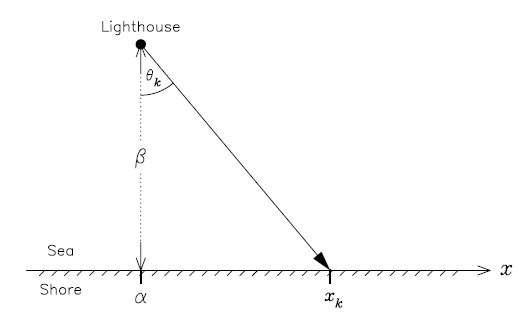](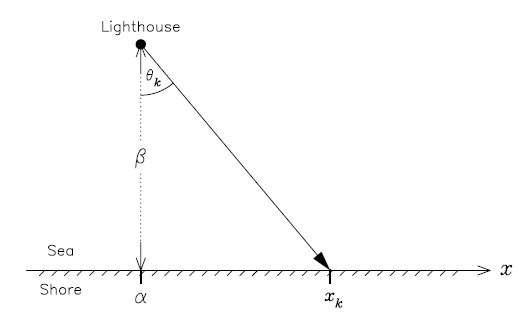)



#### 1) Compute the probability distribution $p(x | x_0,y_0)$ of observing a flash at the point $x$ along the shore depending on the distance of the lighthouse from the shore $y_0$ and its position along the shore $x_0$.

#### Recall: Maximum likelihood estimator

Assume that the data comes from a true probability distribution $x \sim P_{\lambda^{\star}}(x) = P(x|\lambda^{\star})$ for some unknown parameter $\lambda^{\star}.$
The maximum likelihood estimator gives us the parameter $\lambda$ of the distribution $P(\cdot|\lambda)$ that make the observation of a given set of data $\{x_i\}$ most likely under the prior distribution $P(x)$. Assuming that the observations are independent, and that the probability of observing $x$ is given by the probability distribution $P(x|\lambda)$
$$
\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)
$$

There are two additional quantities that will be important for our purpose. The first one is called the score
$$
S(x,\lambda)=\partial_\lambda L(x|\lambda),
$$
where we introduce the log-likelihood $L(x|\lambda)=\log P(x|\lambda)$. Importantly, the expectation of the score with respect to $P(x|\lambda)$ is zero, that is, $\mathbb{E}_{\lambda}[S(x,\lambda)]=0$. The second one is the Fisher information, which corresponds to the variance of the score with respect to the parameter $\lambda$:
$$
I(\lambda)=\mathbb{E}_{\lambda}[S(x|\lambda)^2].
$$
In case of $N$ independent events, we simply have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

##### Consider the case with $x_0=20$, $y_0=15$.

##### Let us first assume that we know the value of $x_0$ but not the one of $y_0$.

Then, we wish to find

$$p(y_0 | \{x_k\}, x_0)$$

Using Bayes’ theorem:

$$p(y_0 | \{x_k\}, x_0) = \frac{p(y_0 , \{x_k\}, x_0)}{p(\{x_k\}, x_0)} = \frac{p(\{x_k\} | y_0, x_0)p(y_0 | x_0)p(x_0)}{p(\{x_k\} | x_0)p(x_0)}\propto p(\{x_k\} | y_0, x_0) p(y_0)$$

where the last step comes from the fact that  $y_0 \perp x_0$, and so we have $p(y_0 | x_0) = p(y_0)$.
The most intuitive prior $p(y_0)$ when we don't have additional information is the one which is uniform over a large enough segment $[y_{min}, y_{max}]$, i.e. $p(y_0) = 1/(y_{max}-y_{min})$

Even if this seems to be a good choice in general, we will show that there exist other priors that lead to a better result.
For the data likelihood $p(\{x_k\} | y_0, x_0)$ we consider that each datum $x_k$ is i.i.d., so:

$$p(\{x_k\} | y_0, x_0) = \prod_{k=1}^N p(x_k | y_0, x_0)$$

And since the prior for $y_0$ is uniform, we finally get:

$$p(y_0 | \{x_k\}, x_0) \propto \prod_{k=1}^N p(x_k | y_0, x_0)$$

Therefore, considering a uniform prior, maximizing the posterior coincides with maximizing the Log-likelihood $L(\{x_k\} | x_0,y_0)$

##### We now make an experiment, by generating $N=100$ samples and plotting the dependence of the log-likelihood as a function of $y_0$.

In [1]:
import numpy as np
np.random.seed(123456) # we set the seed of the random generator

It turns out that the data generating process of the observations $\{x_k\}$ follows a Cauchy distribution with location $x_0$ and scale $y_0^\star$. To generate the set of observations $\{x_k\}$, we can use a built-in function of the `scipy` package.

In [2]:
from scipy.stats import cauchy

N=100
x0_true=20
y0_true=15

x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N) # rvs stands for Random Variates, i.e. particular outcomes of a random variable

Then, let's define the function `loglh` to compute the
log-likelihood for a set of $N$ instances $x$, given the parameters of the Cauchy distribution $x_0$ and $y_0$.

In [3]:
def loglh(x0,y0,x):
  logl=0
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
  return logl

Finally we can compute the log-likelihood for a range of values of $y_0$ around the true value $y_0^*$ and plot its behaviour.

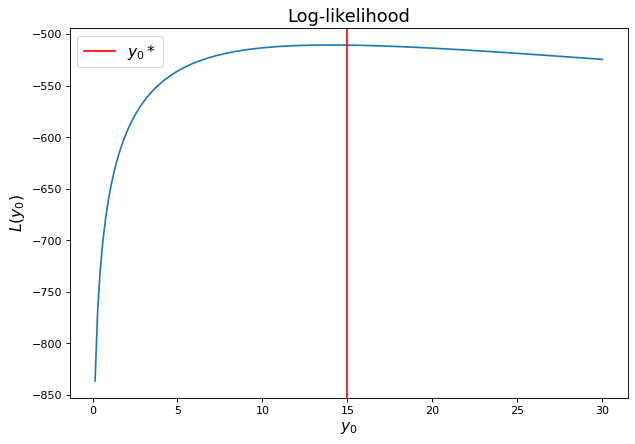

In [4]:
import matplotlib.pyplot as plt

tab_y0=np.linspace(0,30,200)[1:] # we generate a table for y0
logl_y0=np.array([loglh(x0_true,y0,x) for y0 in tab_y0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$L(y_0)$', fontsize=14)
plt.plot(tab_y0,logl_y0)
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

We see that there’s a maximum near the true value, but it's not easy to see since we are working with logs.

However, if we compute the exponential we can get the shape of the posterior $p(y_0 | \{x_k\}, 20)$ (to get the true posterior – a distribution – we would need to find the normalizing factor, which is irrelevant here)

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2977674641.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)


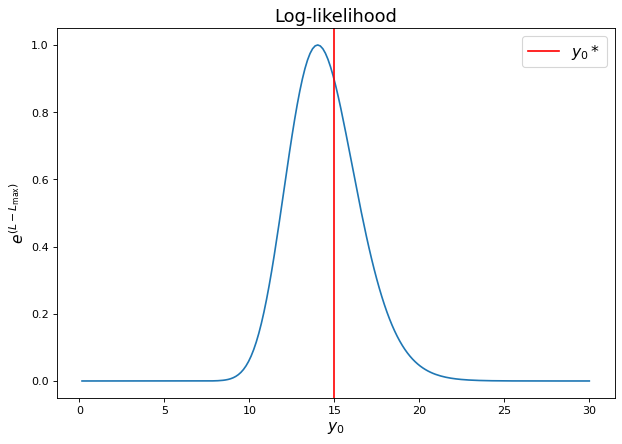

In [5]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_y0,np.exp(logl_y0-max(logl_y0)))
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

##### Now we compute the maximum likelihood estimator for $y_0$, that we call $\widehat{y}_{0,ML}$, and we see how it behaves when we vary the number of data in the sample $\{x_k\}$

A good way to compute the maximum of a function is to use a function from `scipy.optimize` called `minimize`

In [6]:
%%time
from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=10, base=10)
y0_ML=[]
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  y0_guess = np.random.uniform(0,30) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda y0:-loglh(x0_true,y0,x),y0_guess, method='Nelder-Mead')
  y0_ML.append(optimum.x)

CPU times: user 3.74 s, sys: 6.38 ms, total: 3.75 s
Wall time: 3.77 s


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2708132329.py:2: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{y}_{0,ML}$', fontsize=16)


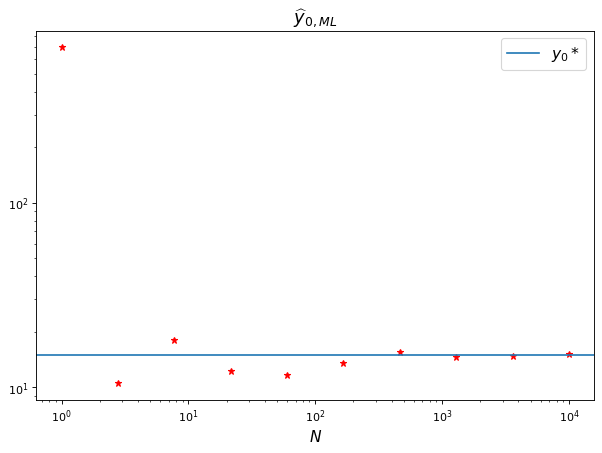

In [7]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{y}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,y0_ML,"*",color='r')
plt.axhline(y0_true, label="$y_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);

#### 2) Now do the same, but in the case in which we know $y_0 = 15$ but we do not know $x_0$, that is again $20$:
* Generate $N=100$ samples Cauchy-distributed according to the same parameters $x_0$ and $y_0$
* Plot  the Log-likelihood for a range of values of $x_0$ around the true value $x_0^*$
* Compute the maximum likelihood estimator for $x_0$ , that we call $\widehat{x}_0$ , and see how it behaves for $N\in[1,10^4]$




<>:30: SyntaxWarning: invalid escape sequence '\w'
<>:30: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-224347374.py:30: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{x}_{0,ML}$', fontsize=16)


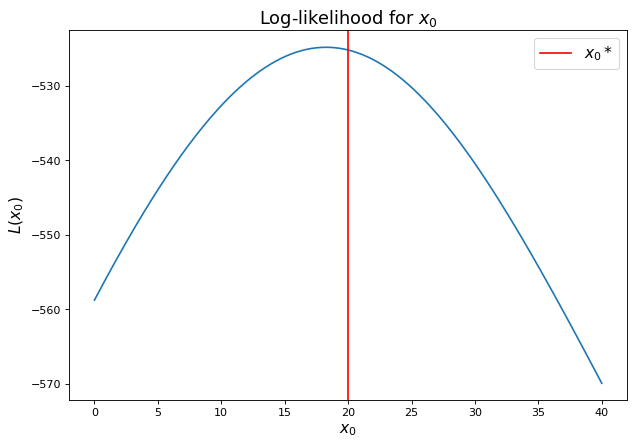

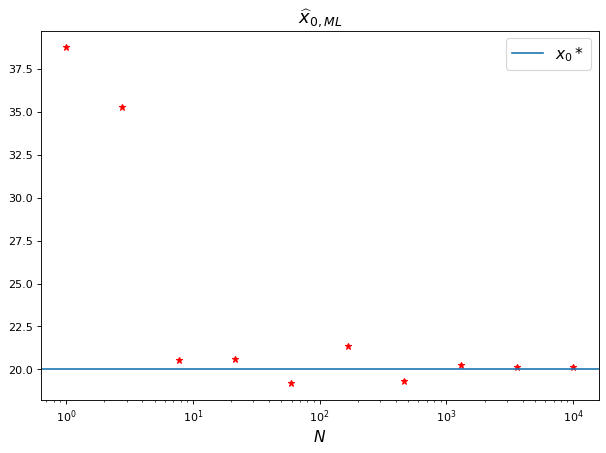

In [8]:
# Generate N=100 samples
N = 100
x0_true = 20
y0_true = 15
x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)

# Plot the Log-likelihood for a range of values of x0
tab_x0 = np.linspace(0, 40, 200)
logl_x0 = np.array([loglh(x0, y0_true, x) for x0 in tab_x0])

fig = plt.figure(figsize=(9, 6), dpi=80)
plt.title('Log-likelihood for $x_0$', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$L(x_0)$', fontsize=14)
plt.plot(tab_x0, logl_x0)
plt.axvline(x0_true, color="r", label='$x_0*$')
plt.legend(fontsize=14)
plt.show()

# Compute the maximum likelihood estimator for x0 for N in [1, 10^4]
tab_N = np.logspace(0, 4, num=10, base=10)
x0_ML = []
for N in tab_N:
    x = cauchy.rvs(loc=x0_true, scale=y0_true, size=int(N))
    x0_guess = np.random.uniform(0, 40)
    optimum = minimize(lambda x0: -loglh(x0, y0_true, x), x0_guess, method='Nelder-Mead')
    x0_ML.append(optimum.x)

fig = plt.figure(figsize=(9, 6), dpi=80)
plt.title('$\widehat{x}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N, x0_ML, "*", color='r')
plt.axhline(x0_true, label="$x_0*$")
plt.xscale("log")
# plt.yscale("log") # x0 can be negative, so log scale is not appropriate here
plt.legend(fontsize=14)
plt.show()

#### 3) Now, after having generated data for N in $[1,10^7]$, try to compute the mean $\left<x\right>$ for each sample as a function of $N$. What do you observe? What about the median?

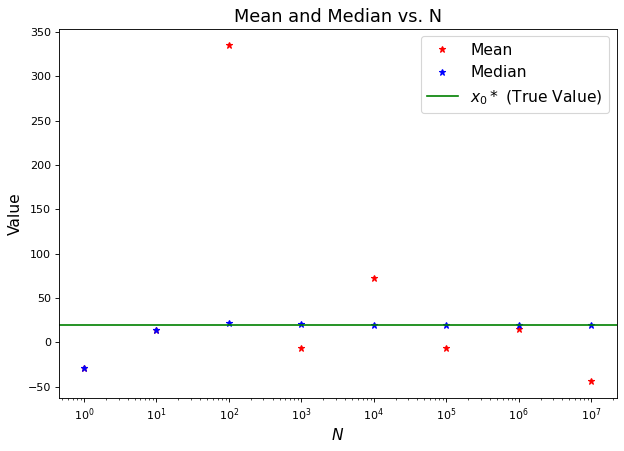

In [9]:
# Generate data for N in [1, 10^7] and compute mean and median
tab_N = np.logspace(0, 7, num=8, base=10)
means = []
medians = []
x0_true = 20
y0_true = 15

for N in tab_N:
    x = cauchy.rvs(loc=x0_true, scale=y0_true, size=int(N))
    means.append(np.mean(x))
    medians.append(np.median(x))

# Plot the mean and median as a function of N
fig = plt.figure(figsize=(9, 6), dpi=80)
plt.title('Mean and Median vs. N', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.plot(tab_N, means, "*", color='r', label='Mean')
plt.plot(tab_N, medians, "*", color='b', label='Median')
plt.axhline(x0_true, color="g", label="$x_0*$ (True Value)")
plt.xscale("log")
plt.legend(fontsize=14)
plt.show()

#### MSE: which estimator is the best?

First of all, let's recall the definition:

**Mean Squared Error**: The mean square error (MSE) is the expectation
value of the square of the difference beween the estimator and the true value of parameter.

$$MSE(\widehat{\lambda};\lambda) \equiv \mathop{\mathbb{E}_{\lambda}}\big[ (\widehat{\lambda} - \lambda)^2 \big]$$

##### **FISHER INFORMATION**

As we recalled earlier, for $N$ independent events we have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

Therefore for our problem

$$
I_N(x_0, y_0) = N \mathbb{E}_x[S(x|x_0)^2] = -N \mathbb{E}_x\begin{bmatrix}\frac{\partial^2 L}{\partial x_0^2} & \frac{\partial^2 L}{\partial x_0\partial y_0}\\ \frac{\partial^2 L}{\partial y_0\partial x_0} & \frac{\partial^2 L}{\partial y_0^2}\end{bmatrix}
$$

And after a bit of computations, and a little help from [wolfram alpha](https://www.wolframalpha.com/calculators/integral-calculator/), one finds that if $x \in(-\infty,+\infty)$ then the Fisher information is

$$I_N(x_0, y_0) =\begin{bmatrix}\frac{N}{2y_0^2} & 0\\0 & \frac{N}{2y_0^2}\end{bmatrix} = \frac{N}{2y_0^2} \mathbb{I}_2$$

And therefore

*   $\det [I_N(x_0,y_0)] = \frac{N^2}{4y_0^4}$
*   $I_N(y_0|x_0) = \frac{N}{2y_0^2}$
*   $I_N(x_0|y_0) = \frac{N}{2y_0^2} = \text{const}$



##### **CRAMÉR-RAO BOUND**

For **unbiased estimators**, as for example the maximum likelihood one, the CRB tells us that for each parameter $\lambda_i$ we have

$$MSE(\widehat{\lambda_i}_{ML};\lambda_i) \geq \{[I_N(\mathbf{\lambda})]^{-1}\}_{ii}$$

where $I_N(\mathbf{\lambda})$ is the Fisher information.

##### **JEFFREYS PRIOR**

In general, the Jeffreys prior is given by

$$p(\mathbf{\lambda}) \propto \sqrt{\det[I_N(\mathbf{\lambda})]}$$

#### Consider the case in which $x_0=20$, and we know its value, and we want to estimate $y_0$

In this case the Cramér-Rao bound tells us:

$$MSE(\widehat{y_0}_{ML};y_0) \geq \frac{2y_0^2}{N}$$

While the Jeffreys prior, normalized, is $p(y_0) = \frac{1}{y_0}$ and thus the posterior

$$p(y_0 | \{x_k\}, x_0) \propto p(\{x_k\} | y_0, x_0) p(y_0) \propto \frac{1}{y_0}\prod_{i=1}^{N}  \frac{1}{\pi} \frac{y_0}{(x_i-x_0)^2 + y_0^2}$$

Now let's compute the MSE on the likelihood estimator and on the one found with Jeffreys prior, and compare the two with the Cramér-Rao bound

Firstly, we define the function to compute the posterior with Jeffreys prior

In [10]:
def jeffpost(x0,y0,x):
  jp= - np.log(y0) #prior
  for elem in x: jp+=np.log(y0/((y0**2+(elem-x0)**2)*np.pi))
  return jp

Since we are going to use it a lot of times, we define a new function `minimizer_y0` to compute the estimators given a function to minimize  

In [11]:
def minimizer_y0(func,y0):
  y0_est=np.zeros(N_rep)
  for ir in range(N_rep):
    x=cauchy.rvs(loc=x0_true,scale=y0,size=N)
    y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
  return y0_est;

To estimate the $MSE$, i.e. to compute the expected value over $\widehat{\lambda}$, we need to repeat the estimation $N_{rep}$ times. We will do this for $N_{est} = 15$ values of $y_0$ in $(0,1]$, starting with $N=10$ and $N_{rep} = 500$

In [12]:
N_est=15
tab_y0=np.linspace(0,1,N_est+1)[1:]
N = 10
N_rep = 500

In [13]:
%%time

y0_ML= np.array([ minimizer_y0(loglh,y0) for y0 in tab_y0])
y0_J= np.array([ minimizer_y0(jeffpost,y0) for y0 in tab_y0])

/tmp/ipython-input-635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
/tmp/ipython-input-994780984.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
/tmp/ipython-input-635590535.py:3: RuntimeWarning: divide by zero encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
/tmp/ipython-input-1296118045.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(y0) #prior
/tmp/ipython-input-1296118045.py:2: RuntimeWarning: divide by zero encountered in log
  jp= - np.log(y0) #prior
/tmp/ipython-input-1296118045.py:3: RuntimeWarning: invalid value encountered in add
  for elem in x: jp+=np.log(y0/((y0**2+(elem

CPU times: user 1min 15s, sys: 96.1 ms, total: 1min 15s
Wall time: 1min 16s


Now that we have computed $N_{rep}$ estimates for each value of $y_0$ with both methods, we can estimate the $MSE$ and we can use **bootstrap** to give a confidence interval on our estimations

First we define the function `MSE_est`
that, given the array of $N_{rep}$ estimates of $y_0$, returns the estimate of the $MSE$ and its C.I.

In [14]:
from numpy import percentile
from numpy.random import choice

def MSE_est(y0_est,y0):
  N_boot=100
  MSE = (y0_est - np.full(N_rep, y0))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

And now we can compute our estimates for each $y_0$

In [15]:
MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J[j], y0)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

And compare them to the Cramér-Rao lower bound

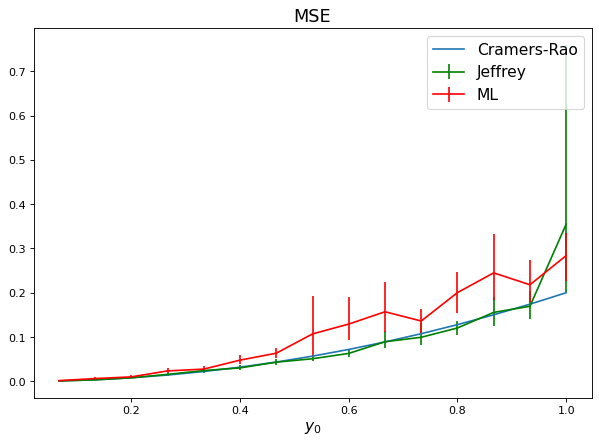

In [16]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_y0,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffrey')
plt.errorbar(tab_y0,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_y0, 2*tab_y0*tab_y0/N, label='Cramers-Rao')
plt.legend(fontsize=14)

#### 4) Now do the same for $N=3$ and $N=50$ and plot all in a single graph, to see what happens when we vary $N$.

/tmp/ipython-input-635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
/tmp/ipython-input-994780984.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
/tmp/ipython-input-635590535.py:3: RuntimeWarning: divide by zero encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
/tmp/ipython-input-1296118045.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(y0) #prior
/tmp/ipython-input-1296118045.py:2: RuntimeWarning: divide by zero encountered in log
  jp= - np.log(y0) #prior
/tmp/ipython-input-1296118045.py:3: RuntimeWarning: invalid value encountered in add
  for elem in x: jp+=np.log(y0/((y0**2+(elem

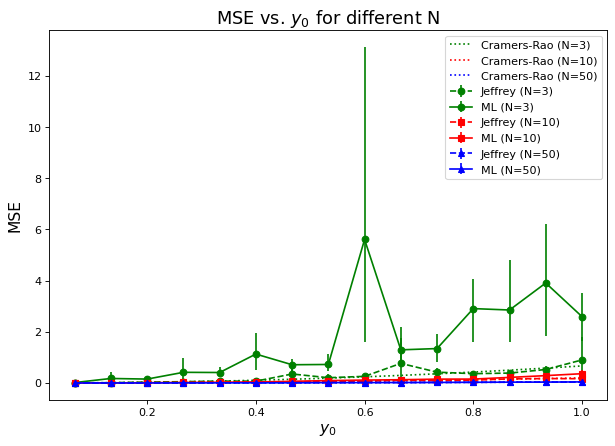

In [17]:
# Define N values to iterate over
N_values = [3, 10, 50]
N_est = 15
tab_y0 = np.linspace(0, 1, N_est + 1)[1:]
N_rep = 500

mse_results_ml = {}
ci_min_results_ml = {}
ci_max_results_ml = {}
mse_results_j = {}
ci_min_results_j = {}
ci_max_results_j = {}

for N in N_values:
    y0_ML = np.array([minimizer_y0(loglh, y0) for y0 in tab_y0])
    y0_J = np.array([minimizer_y0(jeffpost, y0) for y0 in tab_y0])

    MSE_ML = np.zeros(N_est)
    CI_min_ML = np.zeros(N_est)
    CI_max_ML = np.zeros(N_est)
    MSE_J = np.zeros(N_est)
    CI_min_J = np.zeros(N_est)
    CI_max_J = np.zeros(N_est)

    for j, y0 in enumerate(tab_y0):
        MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0)
        MSE_ML[j] = MSE
        CI_min_ML[j] = CI_min
        CI_max_ML[j] = CI_max
        MSE, CI_min, CI_max = MSE_est(y0_J[j], y0)
        MSE_J[j] = MSE
        CI_min_J[j] = CI_min
        CI_max_J[j] = CI_max

    mse_results_ml[N] = MSE_ML
    ci_min_results_ml[N] = CI_min_ML
    ci_max_results_ml[N] = CI_max_ML
    mse_results_j[N] = MSE_J
    ci_min_results_j[N] = CI_min_J
    ci_max_results_j[N] = CI_max_J


fig = plt.figure(figsize=(9, 6), dpi=80)
plt.title('MSE vs. $y_0$ for different N', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('MSE', fontsize=14)

colors = ['g', 'r', 'b']
markers = ['o', 's', '^']

for i, N in enumerate(N_values):
    plt.errorbar(tab_y0, mse_results_j[N], yerr=[mse_results_j[N] - ci_min_results_j[N], ci_max_results_j[N] - mse_results_j[N]],
                 marker=markers[i], color=colors[i], linestyle='--', label=f'Jeffrey (N={N})')
    plt.errorbar(tab_y0, mse_results_ml[N], yerr=[mse_results_ml[N] - ci_min_results_ml[N], ci_max_results_ml[N] - mse_results_ml[N]],
                 marker=markers[i], color=colors[i], linestyle='-', label=f'ML (N={N})')
    plt.plot(tab_y0, 2 * tab_y0 * tab_y0 / N, color=colors[i], linestyle=':', label=f'Cramers-Rao (N={N})')

plt.legend(fontsize=10)
plt.show()

#### 5) Now consider the case in which we know the value of $y_0=15$ but not $x_0$:

* What does Jeffreys prior tell us in this case?
* Compare the MSE on the maximum likelihood and the median estimators for values of $x_0$ in $[-1,1]$ and compare both to the Cramér-Rao bound.
* Repeat the process for $N=3,50$ as before and compare the results.

/tmp/ipython-input-4137643511.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0_est[ir] = optimum.x


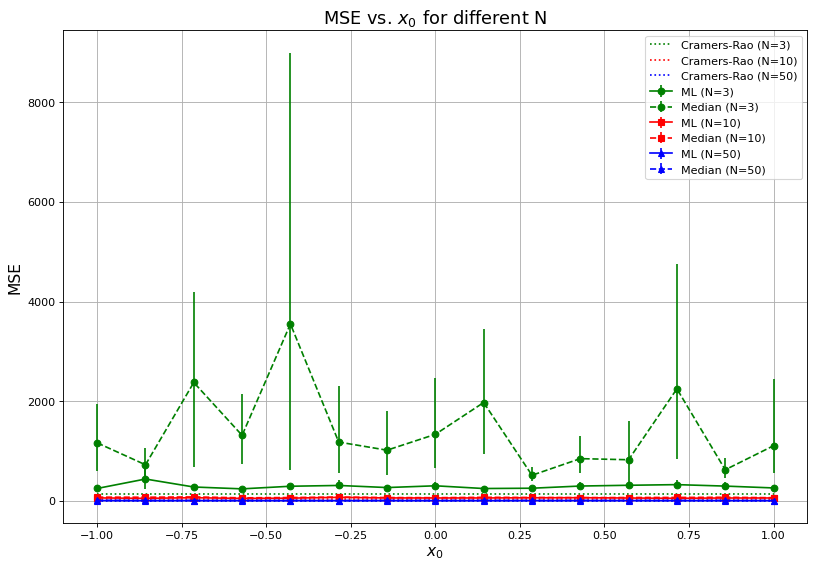

In [18]:
# Define a minimizer function for x0
def minimizer_x0(func, x0, y0):
    x0_est = np.zeros(N_rep)
    for ir in range(N_rep):
        x = cauchy.rvs(loc=x0, scale=y0, size=N)
        x0_guess = np.random.uniform(-10, 10) # Adjusted guess range for x0
        optimum = minimize(lambda val: -func(val, y0, x), x0_guess, method='Nelder-Mead')
        x0_est[ir] = optimum.x
    return x0_est

# Define a function to compute the median estimator for x0
def median_estimator_x0(x0, y0):
    x0_est = np.zeros(N_rep)
    for ir in range(N_rep):
        x = cauchy.rvs(loc=x0, scale=y0, size=N)
        x0_est[ir] = np.median(x)
    return x0_est

# Define N values and the range for x0
N_values = [3, 10, 50]
N_est = 15
tab_x0 = np.linspace(-1, 1, N_est) # Range for x0 as requested
y0_true = 15
N_rep = 500

mse_results_ml = {}
ci_min_results_ml = {}
ci_max_results_ml = {}
mse_results_median = {}
ci_min_results_median = {}
ci_max_results_median = {}

for N in N_values:
    x0_ML = np.array([minimizer_x0(loglh, x0, y0_true) for x0 in tab_x0])
    x0_median = np.array([median_estimator_x0(x0, y0_true) for x0 in tab_x0])

    MSE_ML = np.zeros(N_est)
    CI_min_ML = np.zeros(N_est)
    CI_max_ML = np.zeros(N_est)
    MSE_median = np.zeros(N_est)
    CI_min_median = np.zeros(N_est)
    CI_max_median = np.zeros(N_est)

    for j, x0 in enumerate(tab_x0):
        MSE, CI_min, CI_max = MSE_est(x0_ML[j], x0)
        MSE_ML[j] = MSE
        CI_min_ML[j] = CI_min
        CI_max_ML[j] = CI_max
        MSE, CI_min, CI_max = MSE_est(x0_median[j], x0)
        MSE_median[j] = MSE
        CI_min_median[j] = CI_min
        CI_max_median[j] = CI_max

    mse_results_ml[N] = MSE_ML
    ci_min_results_ml[N] = CI_min_ML
    ci_max_results_ml[N] = CI_max_ML
    mse_results_median[N] = MSE_median
    ci_min_results_median[N] = CI_min_median
    ci_max_results_median[N] = CI_max_median

# Plot the results
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.title('MSE vs. $x_0$ for different N', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('MSE', fontsize=14)

colors = ['g', 'r', 'b']
markers = ['o', 's', '^']

for i, N in enumerate(N_values):
    # Cramér-Rao bound for x0 is constant: 2*y0^2/N
    crb_x0 = 2 * y0_true**2 / N
    plt.plot(tab_x0, np.full(N_est, crb_x0), color=colors[i], linestyle=':', label=f'Cramers-Rao (N={N})')

    plt.errorbar(tab_x0, mse_results_ml[N], yerr=[mse_results_ml[N] - ci_min_results_ml[N], ci_max_results_ml[N] - mse_results_ml[N]],
                 marker=markers[i], color=colors[i], linestyle='-', label=f'ML (N={N})')
    plt.errorbar(tab_x0, mse_results_median[N], yerr=[mse_results_median[N] - ci_min_results_median[N], ci_max_results_median[N] - mse_results_median[N]],
                 marker=markers[i], color=colors[i], linestyle='--', label=f'Median (N={N})')


plt.legend(fontsize=10)
plt.grid(True)
plt.show()

Based on the Fisher Information provided earlier, $I_N(x_0|y_0) = \frac{N}{2y_0^2}$, which is a constant with respect to $x_0$.
The Jeffreys prior is proportional to $\sqrt{\det[I_N(x_0|y_0)]}$. In this univariate case, this is $\sqrt{I_N(x_0|y_0)}$, which is a constant.
Therefore, the Jeffreys prior for $x_0$ when $y_0$ is known is a uniform distribution.

## Estimate both the parameters
Now we consider again the case with $y_0=15$, $x_0=20$, but let's assume that we do not know either $x_0$, $y_0$.

If we assume that both $x_0$ and $y_0$ are uniform over some interval, then the posterior is simply proportional to the likelihood:
$$p(x_0, y_0 | \{x_k\}) \propto p(\{x_k\} | x_0, y_0)$$

We make an experiment, by generating $N=100$ samples and we plot the dependence of log-likelihood as a function of $x_0$ and $y_0$.

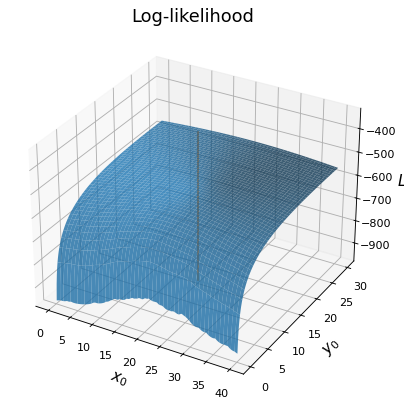

In [19]:
from mpl_toolkits.mplot3d import Axes3D
x0_true=20
y0_true=15
N=100
tab_y0=np.linspace(0,30,201)[1:]
tab_x0=np.linspace(0,40,200)
x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N)
#logl=[[loglh(x0,y,x) for y in taby0] for x0 in tabx0]

fig = plt.figure(figsize=(9,6), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zs = np.array(loglh(np.ravel(X), np.ravel(Y),x))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(max(zs)+200, min(zs), 1000))

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)

plt.show()


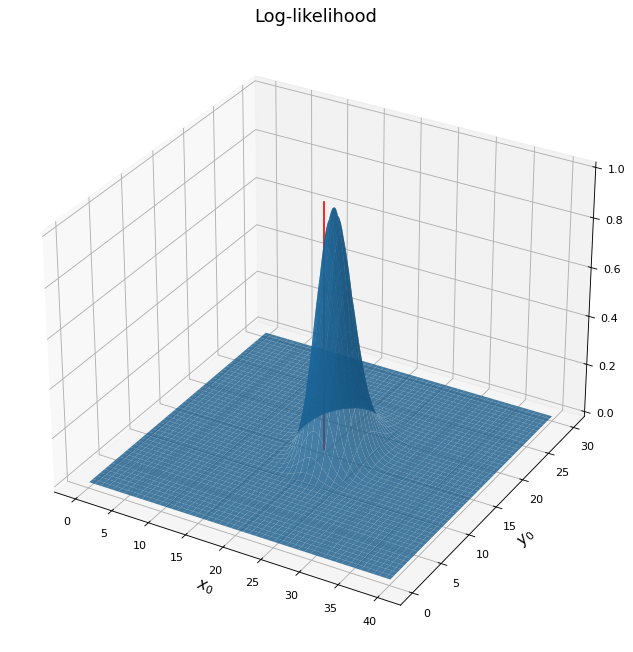

In [20]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zslog = np.array(np.exp(loglh(np.ravel(X), np.ravel(Y),x) - max(zs)))
Z = zslog.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(0,1, 1000),color='r')

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)


plt.show()


##### And finally we compute the ML estimator of both the parameters

In [21]:
%%time
tab_N= np.logspace(0, 4, base=10, num=20)
y0_ML=[]
x0_ML=[]

def f(params):
  x0,y0 = params
  return -loglh(x0,y0,x)

for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  xy0 = (np.random.uniform(0,40),np.random.uniform(0,30))
  #bounds = [(-40,40),(0,50)]
  optimum = minimize(f,xy0, method='Nelder-Mead')
  x0_ML.append(optimum.x[0])
  y0_ML.append(optimum.x[1])

/tmp/ipython-input-635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)


CPU times: user 4.5 s, sys: 6 ms, total: 4.5 s
Wall time: 4.51 s


20 20 20


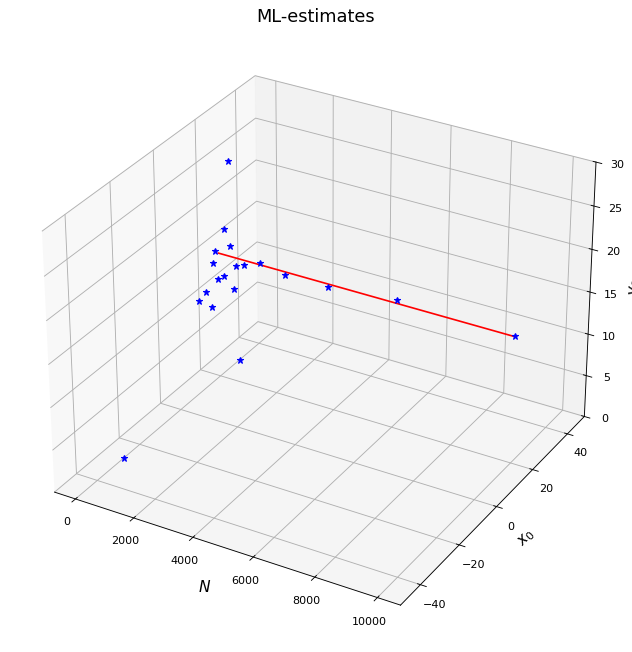

In [22]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sizes = np.array([int(N) for N in tab_N])
print(len(sizes),len(x0_ML), len(y0_ML))
plt.title('ML-estimates', fontsize=16)
ax.plot( range(10000), np.full(10000, x0_true), np.full(10000, y0_true),color='r')
ax.plot(tab_N, x0_ML, y0_ML, marker="*",color='b', ls='None')
ax.set_xlabel('$N$', fontsize=14)
ax.set_ylabel('$x_0$', fontsize=14)
ax.set_zlabel('$y_0$', fontsize=14)

ax.set_ylim(-50,50)
ax.set_zlim(0,30)

plt.show()

## Evaluated!

#### 6) Take the dataset you find in `where_is_the_light.npy` file and import it into a numpy array. It contains $N=10000$ Cauchy-distributed samples with unknown parameters $x_0$ and $y_0$. Using the techniques previously showed, give an estimate (with a confidence interval) of the true value of $x_0$ and $y_0$. You are guaranteed that $x_0 \in [-100,100]$ and $y_0 \in [0,30]$. *Bonus*: which one is better between Jeffreys prior and uniform prior?

In [23]:
# Download the data from the URL
import requests

url = 'https://github.com/IdePHICS/FundamentalLearningEPFL/blob/main/TP2/where_is_the_light.npy?raw=true'
response = requests.get(url)

# Check if the download was successful
if response.status_code == 200:

    with open('where_is_the_light.npy', 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")


    data = np.load('where_is_the_light.npy')

    # Define the function to minimize (negative log-likelihood)
    def neg_loglh(params):
        x0, y0 = params
        # Ensure y0 is positive, as it's a scale parameter
        if y0 <= 0:
            return np.inf
        logl = 0
        for elem in data:
            logl += np.log(y0 / (y0**2 + (elem - x0)**2) / np.pi)
        return -logl

    # Find the maximum likelihood estimates for x0 and y0

    x0_guess = np.median(data) # Median is a good estimator for x0 in Cauchy distribution
    y0_guess = 15 # A value within the expected range

    initial_guess = [x0_guess, y0_guess]

    # Use minimize to find the optimal parameters

    optimum = minimize(neg_loglh, initial_guess, method='Nelder-Mead')

    x0_ml_estimate, y0_ml_estimate = optimum.x
    print(f"Maximum Likelihood Estimate for x0: {x0_ml_estimate}")
    print(f"Maximum Likelihood Estimate for y0: {y0_ml_estimate}")

    # To get a confidence interval, we can use bootstrapping
    N_boot = 500 # Number of bootstrap samples
    estimates_x0 = []
    estimates_y0 = []

    # Resample the data with replacement and find ML estimates for each sample
    for _ in range(N_boot):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Find the optimal parameters for the bootstrap sample
        def neg_loglh_bootstrap(params):
            x0, y0 = params
            if y0 <= 0:
                return np.inf
            logl = 0
            for elem in bootstrap_sample:
                logl += np.log(y0 / (y0**2 + (elem - x0)**2) / np.pi)
            return -logl

        boot_optimum = minimize(neg_loglh_bootstrap, initial_guess, method='Nelder-Mead')
        estimates_x0.append(boot_optimum.x[0])
        estimates_y0.append(boot_optimum.x[1])

    # Compute the confidence intervals (e.g., 95% confidence interval)
    ci_x0_lower, ci_x0_upper = percentile(estimates_x0, [2.5, 97.5])
    ci_y0_lower, ci_y0_upper = percentile(estimates_y0, [2.5, 97.5])

    print(f"95% Confidence Interval for x0: [{ci_x0_lower}, {ci_x0_upper}]")
    print(f"95% Confidence Interval for y0: [{ci_y0_lower}, {ci_y0_upper}]")


else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")

Dataset downloaded successfully.
Maximum Likelihood Estimate for x0: 42.850129206008944
Maximum Likelihood Estimate for y0: 15.74616886211287
95% Confidence Interval for x0: [42.366032677014864, 43.28639708307408]
95% Confidence Interval for y0: [15.32240016440425, 16.19859783634741]


In [ ]:
# Above are the CI for X0 and Y0

In [29]:
# BONUS
# Define the log-posterior with Jeffreys prior
def neg_log_posterior_jeffreys(params):
    x0, y0 = params
    # Ensure y0 is positive
    if y0 <= 0:
        return np.inf
    # Log-likelihood
    logl = 0
    for elem in data: # Using the 'data' loaded from where_is_the_light.npy
        logl += np.log(y0 / (y0**2 + (elem - x0)**2) / np.pi)
    # Log of Jeffreys prior is -2 * log(y0)
    log_jeffreys_prior = -2 * np.log(y0)
    return -(logl + log_jeffreys_prior) # Minimize the negative log-posterior

# Find the MAP estimate with Jeffreys prior
# Using the same initial guess as for the ML estimate
initial_guess_map = [x0_ml_estimate, y0_ml_estimate] # Using ML estimate as a starting point

optimum_jeffreys = minimize(neg_log_posterior_jeffreys, initial_guess_map, method='Nelder-Mead')

x0_map_estimate, y0_map_estimate = optimum_jeffreys.x
print(f"MAP Estimate (Jeffreys Prior) for x0: {x0_map_estimate}")
print(f"MAP Estimate (Jeffreys Prior) for y0: {y0_map_estimate}")

# To compare MSE, I would typically repeat this estimation for many
# For this single dataset, I can compare the ML estimates to the MAP estimates.
print(f"ML Estimate for x0: {x0_ml_estimate}")
print(f"ML Estimate for y0: {y0_ml_estimate}")

MAP Estimate (Jeffreys Prior) for x0: 42.85012818230824
MAP Estimate (Jeffreys Prior) for y0: 15.739848987611577
ML Estimate for x0: 42.850129206008944
ML Estimate for y0: 15.74616886211287


In [ ]:
# For a full MSE comparison, I would need to adapt the MSE_est and minimizer_y0/minimizer_x0
# functions to the 2D case and the Jeffreys prior log-posterior.

In [ ]:
# Define a minimizer function for 2D parameters (x0, y0)
def minimizer_2d(func, x0_true, y0_true, N, N_rep):
    estimates = np.zeros((N_rep, 2)) # Store estimates for both x0 and y0
    for ir in range(N_rep):
        x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)
        # Initial guess for 2D optimization
        initial_guess = [np.random.uniform(x0_true - 10, x0_true + 10), np.random.uniform(1, 25)] # Adjust guess range as needed

        # Define the function to minimize (negative log-likelihood or negative log-posterior)
        def func_to_minimize(params):
            x0, y0 = params
            if y0 <= 0: # Ensure y0 is positive
                return np.inf
            return -func(x0, y0, x) # Assuming func returns log-likelihood or log-posterior

        optimum = minimize(func_to_minimize, initial_guess, method='Nelder-Mead')
        estimates[ir, 0] = optimum.x[0] # Store x0 estimate
        estimates[ir, 1] = optimum.x[1] # Store y0 estimate
    return estimates

# Function to calculate 2D MSE
def mse_2d(estimates, x0_true, y0_true):
    squared_errors = (estimates - np.array([x0_true, y0_true]))**2
    mse = np.mean(np.sum(squared_errors, axis=1)) # Sum squared errors for x0 and y0 for each repetition, then average
    return mse

# --- Perform MSE comparison for ML estimator ---

# Define parameters for simulation
x0_true = 20
y0_true = 15
tab_N = np.logspace(0, 4, base=10, num=10) # N values to test
N_rep = 100 # Number of repetitions for MSE estimation (increase for better accuracy)

mse_ml_2d = []
crb_2d = []

for N in tab_N:
    N_int = int(N)
    print(f"Processing N = {N_int}...")
    # Get ML estimates for N_rep simulations
    ml_estimates = minimizer_2d(loglh, x0_true, y0_true, N_int, N_rep)

    # Calculate 2D MSE for ML estimator
    current_mse_ml = mse_2d(ml_estimates, x0_true, y0_true)
    mse_ml_2d.append(current_mse_ml)

    # Calculate the 2D Cramér-Rao Bound (sum of individual CRBs)
    current_crb_2d = (2 * y0_true**2 / N_int) + (2 * y0_true**2 / N_int)
    crb_2d.append(current_crb_2d)

# Plot the results
fig = plt.figure(figsize=(9, 6), dpi=80)
plt.title('2D MSE of ML Estimator vs. N', fontsize=16)
plt.xlabel('N (log scale)', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.plot(tab_N, mse_ml_2d, marker='o', label='ML Estimator MSE')
plt.plot(tab_N, crb_2d, marker='s', label='2D Cramér-Rao Bound')
plt.xscale('log')
plt.yscale('log') # Use log scale for MSE as well
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

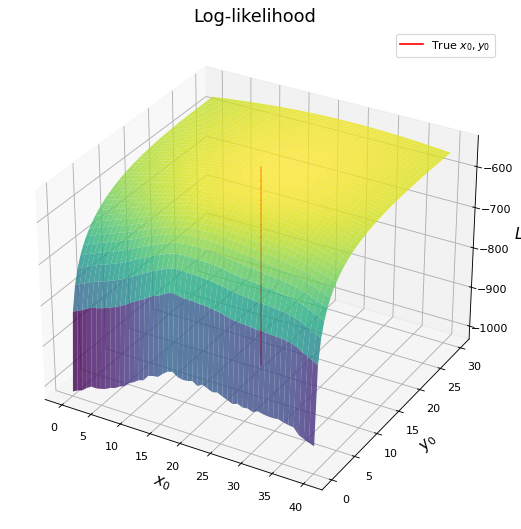

In [25]:
# Log likelihood Plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define the ranges for x0 and y0
tab_y0 = np.linspace(0.1, 30, 50) # Avoid y0=0 for log calculation
tab_x0 = np.linspace(0, 40, 50)

# Generate data (you might want to use the data from question 6 if you want the log-likelihood for that specific dataset)
# For now, let's use a new sample with the true values
x0_true = 20
y0_true = 15
N = 100
x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)


# Compute the log-likelihood for each combination of x0 and y0
X, Y = np.meshgrid(tab_x0, tab_y0)
Z = np.array([loglh(x0, y0, x) for x0, y0 in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Add the red line for true x0 and y0
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(Z.min(), Z.max(), 1000), color='r', label='True $x_0, y_0$')


ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)
ax.legend()

plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3640011429.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax.set_zlabel('$e^{(L-L_{\max})}$', fontsize=14) # Added z-label


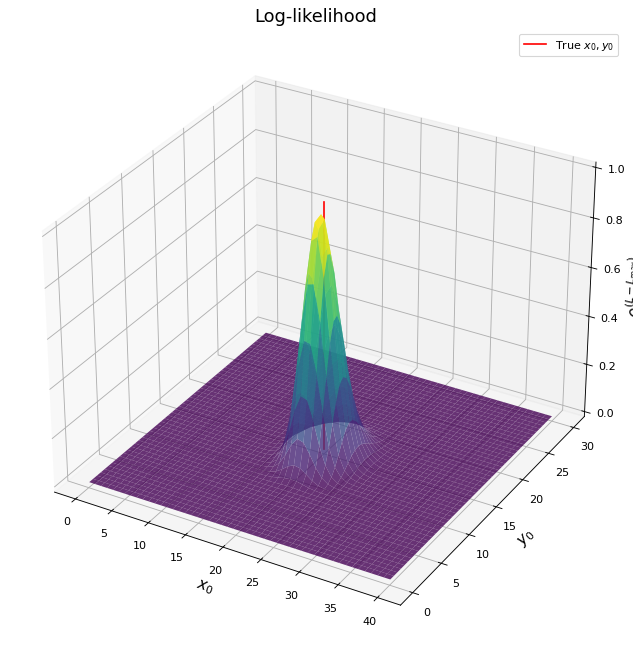

In [26]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)

# Re-compute log-likelihood values (assuming tab_x0, tab_y0, x0_true, y0_true, N, x are defined)
# You might want to use the data from question 6 here if you are analyzing that dataset
tab_y0 = np.linspace(0.1, 30, 50) # Avoid y0=0 for log calculation
tab_x0 = np.linspace(0, 40, 50)
x0_true = 20
y0_true = 15
N = 100
x = cauchy.rvs(loc=x0_true, scale=y0_true, size=N)

X, Y = np.meshgrid(tab_x0,tab_y0)
logl_values = np.array([loglh(x0, y0, x) for x0, y0 in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

# Exponentiate the log-likelihood values, subtracting the maximum for numerical stability
zslog = np.array(np.exp(logl_values - np.max(logl_values)))
Z = zslog.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis') # Added cmap for better visualization
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(0,np.max(Z), 1000),color='r', label='True $x_0, y_0$') # Adjusted z range for the line

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$e^{(L-L_{\max})}$', fontsize=14) # Added z-label

plt.legend() # Added legend
plt.show()

/tmp/ipython-input-635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)


20 20 20


<timed exec>:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.


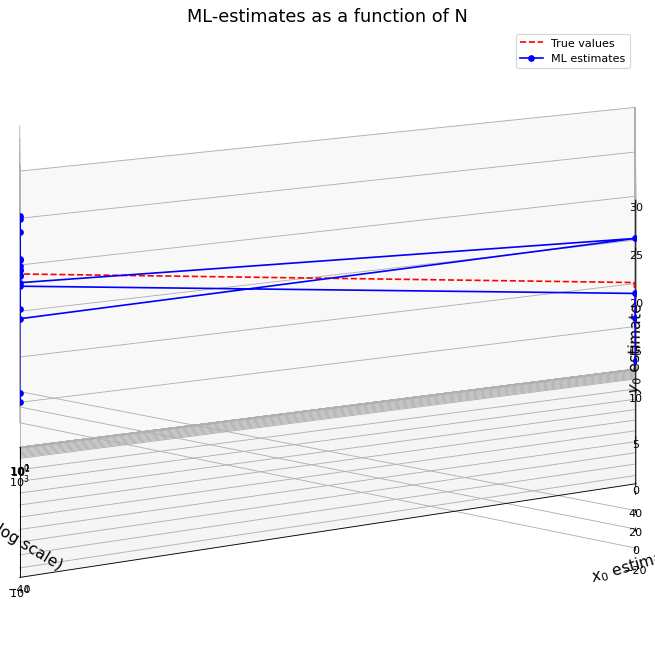

CPU times: user 3.82 s, sys: 7 ms, total: 3.83 s
Wall time: 3.83 s


In [28]:
# It seems ML-Estimate not correct
%%time
tab_N= np.logspace(0, 4, base=10, num=20)
y0_ML=[]
x0_ML=[]

def f(params):
  x0,y0 = params
  return -loglh(x0,y0,x)

for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  xy0 = (np.random.uniform(0,40),np.random.uniform(0,30))
  #bounds = [(-40,40),(0,50)]
  optimum = minimize(f,xy0, method='Nelder-Mead')
  x0_ML.append(optimum.x[0])
  y0_ML.append(optimum.x[1])

fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sizes = np.array([int(N) for N in tab_N])
print(len(sizes),len(x0_ML), len(y0_ML))
plt.title('ML-estimates as a function of N', fontsize=16) # More descriptive title
ax.plot( tab_N, np.full(len(tab_N), x0_true), np.full(len(tab_N), y0_true),color='r', linestyle='--', label='True values') # Improved linestyle and label
ax.plot(tab_N, x0_ML, y0_ML, marker="o", markersize=5, color='b', ls='-', label='ML estimates') # Changed marker and linestyle
ax.set_xlabel('N (log scale)', fontsize=14) # Added axis labels
ax.set_ylabel('$x_0$ estimate', fontsize=14)
ax.set_zlabel('$y_0$ estimate', fontsize=14)

ax.set_ylim(-50,50)
ax.set_zlim(0,30)
ax.set_xscale('log') # Set x-axis to log scale

ax.grid(True) # Add grid lines
ax.legend() # Add legend

# Improve viewing angle
ax.view_init(elev=20., azim=-35) # Adjust elevation and azimuth

plt.show()